In [4]:
from mpmath import *
from numba import jit
import numpy as np
import multiprocessing
import ROOT as R
R.enableJSVis()

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.style.use('classic')
mpl.rc('figure', titlesize=30)
mpl.rc('axes', labelsize=18)
mpl.rc('axes', grid=True)
mpl.rc('grid', linestyle=':')
mpl.rc('legend', fontsize=15)
mpl.rc('figure', figsize=(8, 6))

In [13]:
mp.dps = 100; mp.pretty = True
euler = +euler

In [14]:
euler

0.5772156649015328606065120900824024310421593359399235988057672348848677267776646709369470632917467495

## Double and decimal precision

In [8]:
from math import log

@jit('double(int32)', nopython=True)
def euler_double(n):
    sum = 0.
    for i in range(1, n+1):
        sum += 1/i
    sum -= log(n)
    return sum 

def euler_decimal(n):
    sum = Decimal()
    for i in range(1, n+1):
        sum += Decimal(1) / Decimal(i)
    sum -= Decimal(n).ln()
    return sum 


## Float precision

In [9]:
%%cpp -d
float euler_float(int n){
    float sum = 0.;
    for (int i = 1; i<=n; i++){
        sum += 1 / i ;
    }
    sum -= log(n);
    return sum;
}

In [10]:
%%cpp -d
float euler_float_kahan(int n){
    float sum = 0.;
    double c = 0.;
    for (int i = 1; i<=n; i++){
        float y = (1/ i) - c ;
        float t =  sum + y ;
        c = (t - sum)  - y;
        sum = t;
    }
    sum -= log(n);    
    return sum;
}

In [13]:
results_float = np.array([R.euler_float(int(i)) for i in np.logspace(1, 11, num=40)])

In [7]:
results_float_kahan = np.array([R.euler_float_kahan(int(i)) for i in np.logspace(1, 11, num=40)])

In [11]:
with multiprocessing.Pool(4) as pool:
    n = np.logspace(1, 11, num=40)
    results_double = np.array(pool.map(euler_double, n))

In [12]:
results_double

array([0.62638316, 0.60473632, 0.59275929, 0.58581158, 0.58192523,
       0.57983118, 0.57866424, 0.57801802, 0.57766004, 0.57746195,
       0.57735208, 0.57729126, 0.57725755, 0.57723887, 0.57722852,
       0.57722279, 0.57721961, 0.57721785, 0.57721688, 0.57721634,
       0.57721604, 0.57721587, 0.57721578, 0.57721573, 0.5772157 ,
       0.57721568, 0.57721568, 0.57721567, 0.57721567, 0.57721567,
       0.57721567, 0.57721567, 0.57721567,        nan, 0.57721567,
       0.57721567,        nan, 0.57721567,        nan, 0.57721567])

In [9]:
n = np.logspace(1, 11, num=40)

/usr/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


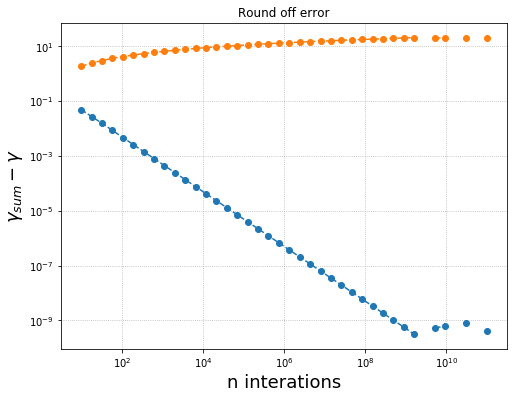

In [15]:
plt.loglog( n , np.abs(results_double - euler), 'o--', label='Double precision')
#plt.loglog( n , np.abs(results_float - euler), 'o--', label='Float precision')
plt.loglog( n , np.abs(results_float_kahan - euler), 'o--', label='Float precision with kahan')
plt.title('Round off error')
plt.xlabel('n interations')
plt.ylabel('$\\gamma_{sum}  - \\gamma$')
plt.show()